# Unit 5 - Financial Planning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install colab-env --upgrade

  Created wheel for colab-env: filename=colab_env-0.2.0-cp37-none-any.whl size=3837 sha256=ce71f660adeb029ad8452f18d2833fa77c2f64d460cdb5fa8bff331ab9c30668
  Stored in directory: /root/.cache/pip/wheels/81/9c/85/7ec1faca43d1a5df32f33f4e22d5ae91f301a5406779528ead
Successfully built colab-env


In [3]:
!pip install alpaca-trade-api

     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 


In [4]:
#The most reliable way to import local resources

In [5]:
!cp '/content/drive/MyDrive/BootCampSpot/MCForecastTools.py' .
!cp '/content/drive/MyDrive/BootCampSpot/pandasPalmer.py' .
!cp '/content/drive/MyDrive/BootCampSpot/rsaPalmer.py' .
!cp '/content/drive/MyDrive/BootCampSpot/.env' .

In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import importlib
#import MCForecastTools
from MCForecastTools import MCSimulation
import rsaPalmer

%matplotlib inline

Default Path = /content/drive/MyDrive/BootCampSpot/
Default Env file Path = /content/drive/MyDrive/BootCampSpot/.env exists
File rsaPalmer is being imported


In [7]:

importlib.reload(rsaPalmer)

Default Path = /content/drive/MyDrive/BootCampSpot/
Default Env file Path = /content/drive/MyDrive/BootCampSpot/.env exists
File rsaPalmer is being imported


<module 'rsaPalmer' from '/content/rsaPalmer.py'>

In [8]:
# Load .env enviroment variables
# Loads the .env file and set's the ENV variables for use.
env_val = os.getenv('PalmerEnv')
if (env_val == None):
  env_file = '/content/drive/MyDrive/BootCampSpot/.env'
  if not load_dotenv(find_dotenv(filename=env_file, raise_error_if_not_found=True)):
    print('Failed to load the environment variables, ensure the Directory exists')
  else:
    print('Sucessfully Loaded the Environment Variables')
elif env_val == "True":
  print('The Environmental Variables are already loaded')


Sucessfully Loaded the Environment Variables


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
import requests

In [10]:
# Set current amount of crypto assets
#@title My BitCoin and Etherium
my_btc        =  1.2 #@param {type:"number"}
my_eth        =  5.6 #@param {type:"number"}
#avg_hh_income = 12000 #@param {type:"number"}

In [11]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [12]:
# Fetch current BTC price
btc_info = requests.get(btc_url)

if (btc_info.status_code==200):
  btc_price = btc_info.json()["data"]["1"]["quotes"]["CAD"]["price"]
else:
  print(f'Failed to connect to [{btc_url}] for the current price')

# Fetch current ETH price
eth_info = requests.get(eth_url)

if (eth_info.status_code==200):
  eth_price = eth_info.json()["data"]["1027"]["quotes"]["CAD"]["price"]
else:
  print(f'Failed to connect to [{eth_url}] for the current price')

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is CAD${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is CAD${my_eth_value:0,.2f}")


The current value of your 1.2 BTC is CAD$60,159.45
The current value of your 5.6 ETH is CAD$17,741.67


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
# The keys that end with '_enc' have been encrypted in the .env file, it will be automatically decrypted.
alpc_API_key = rsaPalmer.Get_API_Key('ALPACA_API_KEY_enc')[1] # Gets and decrypts key
alpc_SECRET_key = rsaPalmer.Get_API_Key('ALPACA_SECRET_KEY_enc')[1] # Gets and decrypts key

# Create the Alpaca API object
trial_market = 'https://paper-api.alpaca.markets'
import alpaca_trade_api as alpaca
api = alpaca.REST(alpc_API_key, alpc_SECRET_key, trial_market, api_version="v2")

Public file exists
Private file exists
Public file exists
Private file exists


In [15]:
# Format current date as ISO format
from datetime import datetime
current_date = pd.Timestamp(datetime.now()).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    symbols=tickers,
    timeframe=timeframe,
    start=current_date,
    limit= 1000
).df

# Preview DataFrame
df_ticker.head()

AGG            ...     SPY            
                             open      high  ...   close      volume
time                                         ...                    
2017-06-23 00:00:00-04:00  110.01  110.1085  ...     NaN         NaN
2017-06-26 00:00:00-04:00  110.19  110.2400  ...  243.27  43153677.0
2017-06-27 00:00:00-04:00  109.93  109.9800  ...  241.36  60858189.0
2017-06-28 00:00:00-04:00  109.85  109.8800  ...  243.46  50076355.0
2017-06-29 00:00:00-04:00  109.53  109.6800  ...  241.39  87799860.0

[5 rows x 10 columns]

In [16]:
df_ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1001 entries, 2017-06-23 00:00:00-04:00 to 2021-06-15 00:00:00-04:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (AGG, open)    1000 non-null   float64
 1   (AGG, high)    1000 non-null   float64
 2   (AGG, low)     1000 non-null   float64
 3   (AGG, close)   1000 non-null   float64
 4   (AGG, volume)  1000 non-null   float64
 5   (SPY, open)    1000 non-null   float64
 6   (SPY, high)    1000 non-null   float64
 7   (SPY, low)     1000 non-null   float64
 8   (SPY, close)   1000 non-null   float64
 9   (SPY, volume)  1000 non-null   float64
dtypes: float64(10)
memory usage: 86.0 KB


In [17]:
df_AGG_close = df_ticker['AGG']['close']
df_AGG_close

time
2017-06-23 00:00:00-04:00    110.070
2017-06-26 00:00:00-04:00    110.160
2017-06-27 00:00:00-04:00    109.830
2017-06-28 00:00:00-04:00    109.850
2017-06-29 00:00:00-04:00    109.640
                              ...   
2021-06-09 00:00:00-04:00    115.050
2021-06-10 00:00:00-04:00    115.300
2021-06-11 00:00:00-04:00    115.240
2021-06-14 00:00:00-04:00    114.970
2021-06-15 00:00:00-04:00    114.995
Name: close, Length: 1001, dtype: float64

In [18]:
# Pick AGG and SPY close prices
df_AGG_close = df_ticker['AGG']['close']
df_SPY_close = df_ticker['SPY']['close']
df_COMB_close = pd.concat(objs=[df_AGG_close,df_SPY_close], axis='columns', join='inner')
df_COMB_close.columns = tickers

# Last Trading Day
last_trading_day = max(df_COMB_close.index)

date_filtr = (df_COMB_close.index == last_trading_day)

agg_close_price = df_COMB_close.loc[date_filtr, 'AGG'].values[0]
spy_close_price = df_COMB_close.loc[date_filtr, 'SPY'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.995
Current SPY closing price: $424.6


In [19]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy:3} SPY shares is ${my_spy_value:10,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:10,.2f}")

The current value of your  50 SPY shares is $ 21,230.00
The current value of your 200 AGG shares is $ 22,999.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12_000

# Consolidate financial assets data
assets =[{'bitcoin':my_btc_value},{'ethereum':my_eth_value},{'SPY stock':my_spy_value},{'AGG stock':my_agg_value}]
assets = {'Asset':['bitcoin','ethereum','SPY stock','AGG stock'], 
          'Value':[my_btc_value,my_eth_value,my_spy_value,my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data=assets, index=['bitcoin','ethereum','SPY stock','AGG stock'])
xidx = df_savings['Asset'].to_list()

# Display savings DataFrame
display(df_savings)

,Asset,Value
bitcoin,bitcoin,60159.453120
ethereum,ethereum,17741.667552
SPY stock,SPY stock,21230.000000
AGG stock,AGG stock,22999.000000


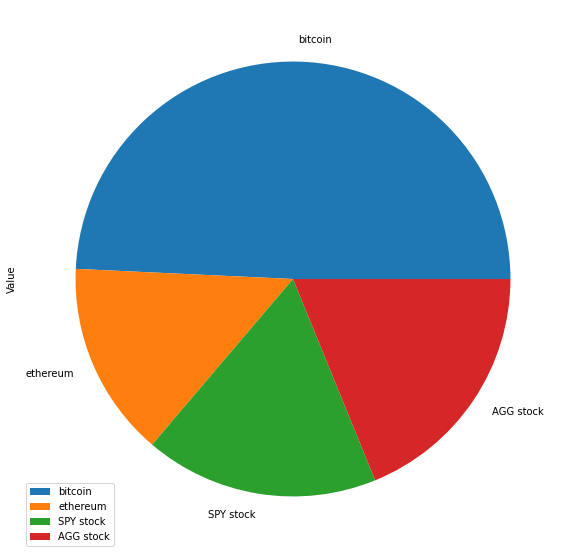

In [21]:
# Plot savings pie chart
plt.show(
    df_savings.plot.pie(y='Value', figsize=(10,10))
)


In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Value'].sum()

# Validate saving health
if total_savings > emergency_fund:
  print(f'Your savings (CAD${total_savings:0,.2f}) exceeds your emergency fund (CAD${emergency_fund:0,.2f}) requirements by CAD${total_savings - emergency_fund:0,.2f}')
else:
  print(f'You need to increase your emergench funds by (CAD${emergency_fund - total_savings:0,.2f})')

Your savings (CAD$122,130.12) exceeds your emergency fund (CAD$36,000.00) requirements by CAD$86,130.12


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
from datetime import timedelta

In [62]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date   = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [63]:
(start_date,
 end_date)

('2016-05-01T00:00:00-04:00', '2021-05-01T00:00:00-04:00')

In [86]:
api.get_barset(
    symbols=tickers,
    timeframe=timeframe,
    start=start_date,
    end=end_date,
    limit= 10
).df

AGG            ...     SPY          
                             open      high  ...   close    volume
time                                         ...                  
2021-04-19 00:00:00-04:00  114.00  114.5000  ...  415.24  66226327
2021-04-20 00:00:00-04:00  114.42  114.6700  ...  412.22  69715050
2021-04-21 00:00:00-04:00  114.60  114.7400  ...  416.08  54772634
2021-04-22 00:00:00-04:00  114.74  114.8000  ...  412.30  90086341
2021-04-23 00:00:00-04:00  114.81  115.0860  ...  416.72  62184753
2021-04-26 00:00:00-04:00  114.74  114.8015  ...  417.64  44689009
2021-04-27 00:00:00-04:00  115.13  115.1300  ...  417.48  45962655
2021-04-28 00:00:00-04:00  114.45  114.4685  ...  417.35  45533863
2021-04-29 00:00:00-04:00  114.14  114.3700  ...  419.98  70595229
2021-04-30 00:00:00-04:00  114.41  114.5150  ...  417.30  73129109

[10 rows x 10 columns]

In [85]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
trading_days = 252 * 5
max_day_count = 1000
df_part_1 = api.get_barset(
    symbols=tickers,
    timeframe=timeframe,
    start=start_date,
    limit= 1000
).df

a = (max(df_part_1.index) + timedelta(days=1)).isoformat()
df_part_2 = api.get_barset(
    symbols= tickers,
    timeframe= timeframe,
    start= a,
    end  = end_date
).df

print(start_date,a,end_date)


df_stock_data = pd.concat(objs=[df_part_1,df_part_2], axis='rows', join='inner', sort=True)
# Display sample data
#df_stock_data.head()
df_stock_data
df_part_1

2016-05-01T00:00:00-04:00 2021-06-16T00:00:00-04:00 2021-05-01T00:00:00-04:00


AGG            ...     SPY            
                             open      high  ...   close      volume
time                                         ...                    
2017-06-23 00:00:00-04:00  110.01  110.1085  ...     NaN         NaN
2017-06-26 00:00:00-04:00  110.19  110.2400  ...  243.27  43153677.0
2017-06-27 00:00:00-04:00  109.93  109.9800  ...  241.36  60858189.0
2017-06-28 00:00:00-04:00  109.85  109.8800  ...  243.46  50076355.0
2017-06-29 00:00:00-04:00  109.53  109.6800  ...  241.39  87799860.0
...                           ...       ...  ...     ...         ...
2021-06-09 00:00:00-04:00  115.43  115.4300  ...  421.62  38368598.0
2021-06-10 00:00:00-04:00  115.30  115.3100  ...  423.58  43577329.0
2021-06-11 00:00:00-04:00  115.31  115.3200  ...  424.31  37018077.0
2021-06-14 00:00:00-04:00  115.18  115.1800  ...  425.29  33128340.0
2021-06-15 00:00:00-04:00  114.90  115.0200  ...  424.50  42885806.0

[1001 rows x 10 columns]

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")